In [1]:
from coremltools.models.neural_network import datatypes, NeuralNetworkBuilder
from coremltools.models.utils import save_spec
import numpy as np
import coremltools as ct
from coremltools.models.neural_network.flexible_shape_utils import NeuralNetworkMultiArrayShape, NeuralNetworkMultiArrayShapeRange

In [ ]:
dtype = 'float32'
input_dim = [1]

In [ ]:
from coremltools.converters.mil.input_types import RangeDim
input_shape = ct.Shape(shape=(1, RangeDim(), 84))
input_shape.default

In [ ]:
input_shape = ct.Shape(shape=(1, ct.RangeDim(),84))

In [ ]:
inputs = [('input1', datatypes.Array(*input_dim)),
          ('input2', datatypes.Array(*input_dim))]
inputs

In [ ]:
output = [('output', datatypes.Array(*input_dim))]

In [ ]:
builder = NeuralNetworkBuilder(inputs, output, disable_rank5_shape_mapping=True)

In [ ]:
builder.add_load_constant_nd(name ="C=3", constant_value= np.array([3]), output_name='C=3', shape=(1,))

In [ ]:
builder.add_elementwise(name='I2*3', input_names=['input2', "C=3"], output_name='I2*3', mode='MULTIPLY')

In [ ]:
builder.add_elementwise(name='Add',
                        input_names=['input1', 'I2*3'],
                        output_name='output',
                        mode='ADD')

In [ ]:
model = ct.models.MLModel(builder.spec)

In [ ]:
print(model)

In [ ]:
model.predict(data={"input1": np.array([3]).astype(dtype), "input2" : np.array([ 6]).astype(dtype)})['output']

In [ ]:
builder.spec.description.input

In [ ]:
ma_type = builder.spec.description.input[0].type.multiArrayType

In [ ]:
ma_type.shapeRange.sizeRanges.add()

In [ ]:
ma_type.shapeRange.sizeRanges[0].lowerBound = 0

In [ ]:
ma_type.shapeRange.sizeRanges[0].upperBound = -1

In [ ]:
builder.spec.description.input

In [ ]:
ma_type = builder.spec.description.input[1].type.multiArrayType

In [ ]:
ma_type.shapeRange.sizeRanges.add()

In [ ]:
ma_type.shapeRange.sizeRanges[0].lowerBound = 0

In [ ]:
ma_type.shapeRange.sizeRanges[0].upperBound = -1

In [ ]:
builder.spec.description.input

In [ ]:
ma_type = builder.spec.description.output[0].type.multiArrayType

In [ ]:
ma_type.shapeRange.sizeRanges.add()

In [ ]:
ma_type.shapeRange.sizeRanges[0].lowerBound = 0

In [ ]:
ma_type.shapeRange.sizeRanges[0].upperBound = -1

In [ ]:
builder.spec.description.output

In [ ]:
model_2 = ct.models.MLModel(builder.spec)

In [ ]:
print(model_2)

In [ ]:
model_2.predict(
    data={
        "input1": np.array([3.2, 4, 100, 33]).astype(dtype),
        "input2" : np.array([ 6, 5, 1, 2]).astype(dtype)
    }
)['output']

In [ ]:
ma_type


# test decoder

In [89]:
num_classe = 80
total_len = 4+ num_classe

In [90]:
yolo_coreml_model = ct.models.MLModel('yolov3Coreml_converted_tiny_quantized_29thMay2022.mlmodel')
spec = yolo_coreml_model.get_spec()

In [91]:
spec.description

input {
  name: "input_1"
  type {
    imageType {
      width: 608
      height: 608
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 608
          upperBound: 608
        }
        heightRange {
          lowerBound: 608
          upperBound: 608
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: 1
        }
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 84
          upperBound: 84
        }
      }
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.2.0"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "4.0b3"
  }
}

In [465]:
detector_builder = ct.models.neural_network.NeuralNetworkBuilder(spec= spec)

In [466]:
detector_builder.set_output(output_names=['Identity'], output_dims=[(1,1,84)])

In [467]:
detector_builder.spec.description

input {
  name: "input_1"
  type {
    imageType {
      width: 608
      height: 608
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 608
          upperBound: 608
        }
        heightRange {
          lowerBound: 608
          upperBound: 608
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      shape: 1
      shape: 1
      shape: 84
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: 1
        }
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 84
          upperBound: 84
        }
      }
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.2.0"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "4.0b3"
  }
}

In [468]:
yolo_coreml_model_modified = ct.models.MLModel(detector_builder.spec)

In [469]:
# from coremltools.models.neural_network import flexible_shape_utils
# array_shapes = [flexible_shape_utils.NeuralNetworkMultiArrayShape(3)]
# second_shape = flexible_shape_utils.NeuralNetworkMultiArrayShape()
# second_shape.set_channel_shape(1)
# second_shape.set_height_shape(1)
# second_shape.set_width_shape(84)
# array_shapes.append(second_shape)
# flexible_shape_utils.add_enumerated_multiarray_shapes(spec, feature_name='Identity', shapes=array_shapes)
# flexible_shape_utils.update_multiarray_shape_range(spec, 'Identity', )

In [808]:
inputs = [(spec.description.output[0].name, datatypes.Array(1,1,total_len))]
# inputs = [(spec.description.output[0].name, None)]
# output = [
#     ('x', datatypes.Array(1)),
#     ('y', datatypes.Array(1)),
#     ('w', datatypes.Array(1)),
#     ('h', datatypes.Array(1)),
#     ('scores', datatypes.Array(2))
# ]

# output = [
#     ('boxes', datatypes.Array(0, 4)),
#     ('scores', datatypes.Array(0, num_classe))
# ]

output = [
    ('all_scores', None),
    ('all_boxes', None)
]

In [809]:
test_builder = NeuralNetworkBuilder(inputs, output, disable_rank5_shape_mapping=True)

In [810]:
test_builder.spec.description.input[0].ParseFromString(spec.description.output[0].SerializeToString())

52

In [811]:
input_ma_type = test_builder.spec.description.input[0].type.multiArrayType
# input_ma_type.shapeRange.sizeRanges.add()
# input_ma_type.shapeRange.sizeRanges.add()
# input_ma_type.shapeRange.sizeRanges.add()
# input_ma_type.shapeRange.sizeRanges[0].lowerBound = 1
# input_ma_type.shapeRange.sizeRanges[0].upperBound = 1

# input_ma_type.shapeRange.sizeRanges[1].lowerBound = 0
# input_ma_type.shapeRange.sizeRanges[1].upperBound = -1

# input_ma_type.shapeRange.sizeRanges[2].lowerBound = total_len
# input_ma_type.shapeRange.sizeRanges[2].upperBound = total_len

input_ma_type

shape: 1
shape: 80
dataType: DOUBLE
shapeRange {
  sizeRanges {
    lowerBound: 1
    upperBound: 1
  }
  sizeRanges {
    upperBound: -1
  }
  sizeRanges {
    lowerBound: 84
    upperBound: 84
  }
}

In [812]:
box_ma_type = test_builder.spec.description.output[0].type.multiArrayType
box_ma_type.shape

[]

In [813]:
# box_ma_type = test_builder.spec.description.output[0].type.multiArrayType
# box_ma_type.shapeRange.sizeRanges.add()
# box_ma_type.shapeRange.sizeRanges.add()
# box_ma_type.shapeRange.sizeRanges[0].lowerBound = 0
# box_ma_type.shapeRange.sizeRanges[0].upperBound = -1

# box_ma_type.shapeRange.sizeRanges[1].lowerBound = 4
# box_ma_type.shapeRange.sizeRanges[1].upperBound = 4

# box_ma_type

In [814]:
# score_ma_type = test_builder.spec.description.output[1].type.multiArrayType
# score_ma_type.shapeRange.sizeRanges.add()
# score_ma_type.shapeRange.sizeRanges.add()
# score_ma_type.shapeRange.sizeRanges[0].lowerBound = 0
# score_ma_type.shapeRange.sizeRanges[0].upperBound = -1

# score_ma_type.shapeRange.sizeRanges[1].lowerBound = num_classe
# score_ma_type.shapeRange.sizeRanges[1].upperBound = num_classe

# score_ma_type

In [815]:
# test_builder.set_output([''])

In [816]:
test_builder.spec.description

input {
  name: "all_scores"
  type {
    multiArrayType {
      shape: 1
      shape: 80
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: 1
        }
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 84
          upperBound: 84
        }
      }
    }
  }
}
output {
  name: "all_scores"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}
output {
  name: "all_boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}

In [817]:
test_builder.add_split_nd(
    'split_coordinates', 
    input_name= 'Identity', 
    output_names= ['x', 'y', 'w', 'h', 'scores0'],
    axis = 2,
    split_sizes=[1, 1, 1, 1, num_classe]
)

name: "split_coordinates"
input: "Identity"
output: "x"
output: "y"
output: "w"
output: "h"
output: "scores0"
splitND {
  axis: 2
  numSplits: 5
  splitSizes: 1
  splitSizes: 1
  splitSizes: 1
  splitSizes: 1
  splitSizes: 80
}

In [818]:
test_builder.add_squeeze(
    'squeeze_scores',
    input_name= 'scores0', 
    output_name='all_scores:0', axes=[0]
    
#     squeeze_all = True
)

name: "squeeze_scores"
input: "scores0"
output: "all_scores:0"
squeeze {
  axes: 0
}

In [819]:
test_builder.add_stack(
    'box:0', 
    input_names=['x', 'y', 'w', 'h'], 
    output_name='box:0', 
    axis=2)

name: "box:0"
input: "x"
input: "y"
input: "w"
input: "h"
output: "box:0"
stack {
  axis: 2
}

In [820]:
# test_builder.add_transpose(
#     'box_trans_node', 
#     axes=(0,1,2, 4,3), 
#     input_name='box:0', 
#     output_name= 'box'
# )

In [821]:

test_builder.add_squeeze(
    'squeeze_box',
    input_name= 'box:0', 
    output_name='all_boxes:0',
    
    squeeze_all = True
)

name: "squeeze_box"
input: "box:0"
output: "all_boxes:0"
squeeze {
  squeezeAll: true
}

In [822]:
test_builder.add_nms(
    'nms', 
    input_names=['all_boxes:0', 'all_scores:0'], 
    output_names=['all_boxes', 'all_scores'], 
    iou_threshold= 0.5, 
    score_threshold=0.4, 
    per_class_suppression=True
)

IndexError: list index out of range

In [772]:
# test_builder.add_reshape_static(
#     'reshape_box', 
#     input_name='squeeze_box', 
#     output_name='box',
#     output_shape=(1, 4))

In [773]:
split_model = ct.models.MLModel(test_builder.spec)

In [774]:
print(split_model)

input {
  name: "Identity"
  type {
    multiArrayType {
      shape: 1
      shape: 1
      shape: 84
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: 1
        }
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 84
          upperBound: 84
        }
      }
    }
  }
}
output {
  name: "all_scores"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}
output {
  name: "all_boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}



In [775]:
num_predictions = 2 

test_arr = np.arange(num_predictions * total_len).reshape(1,num_predictions,total_len).astype('double')
print(test_arr.shape)
print('-------')
print(test_arr)

(1, 2, 84)
-------
[[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
    14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
    28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
    42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
    56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
    70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.]
  [ 84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
    98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
   112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
   126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
   140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
   154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.]]]


In [776]:
pred = split_model.predict(data={'Identity' : test_arr})
pred

{'all_scores': array([[  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
          15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
          26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
          37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
          48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
          59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
          70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
          81.,  82.,  83.],
        [ 88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
          99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
         110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
         121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
         132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
         143., 144., 145., 146., 147., 148., 149., 150., 1

In [777]:
pred['all_boxes'].shape

(2, 4)

In [778]:
pred['all_scores'].shape

(2, 80)

In [779]:
split_model.save('decoder.mlmodel')

# pipeline

In [664]:
INPUT_NODE = 'input_1'
OUTPUT_NODE = 'Identity'

In [665]:
from coremltools.models.neural_network import datatypes, NeuralNetworkBuilder

input_features = [ (INPUT_NODE, datatypes.Array(1,1,1))]
output_features = [ 'all_scores', 'all_boxes' ]
pipeline = ct.models.pipeline.Pipeline(input_features, output_features)
pipeline.spec.specificationVersion = 3

In [666]:
pipeline.add_model(yolo_coreml_model_modified)

In [667]:
pipeline.add_model(split_model)

In [668]:
pipeline.spec.description.input[0].ParseFromString(yolo_coreml_model_modified._spec.description.input[0].SerializeToString())

40

In [669]:
pipeline.spec.description.output[0].ParseFromString(split_model._spec.description.output[0].SerializeToString())
pipeline.spec.description.output[1].ParseFromString(split_model._spec.description.output[1].SerializeToString())

19

In [670]:
pipeline.spec.description

input {
  name: "input_1"
  type {
    imageType {
      width: 608
      height: 608
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 608
          upperBound: 608
        }
        heightRange {
          lowerBound: 608
          upperBound: 608
        }
      }
    }
  }
}
output {
  name: "all_scores"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}
output {
  name: "all_boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}

In [671]:
model_pipeline = ct.models.MLModel(pipeline.spec)

In [672]:
from PIL import Image
def load_local_and_scale_image(image_path, shape):
    image = Image.open(image_path)
    return image.resize(shape)

In [673]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, interpolation = 'bilinear', target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0

    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    
    return image, width, height

In [674]:
input_w, input_h = 608, 608
photo_filename = '/Users/ankit/Desktop/test_image_samples/11631210275_bce9e1af20.jpeg'
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
print("image initial size: ", image_w, image_h)
print("input image",image.shape)

image initial size:  500 334
input image (1, 608, 608, 3)


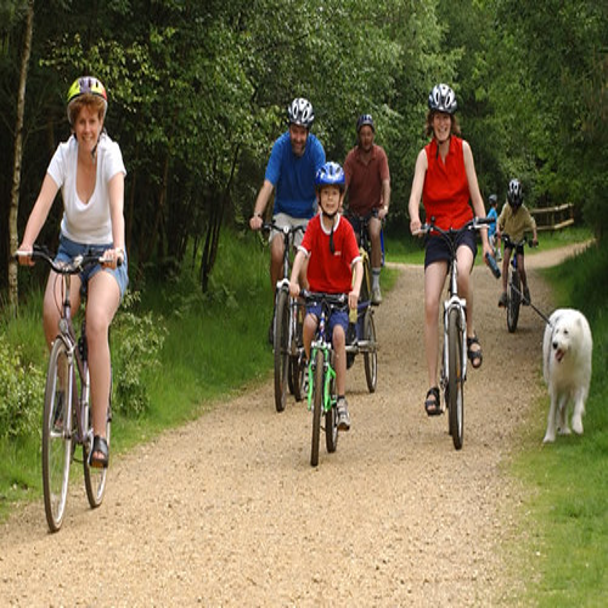

In [675]:
test_image = load_local_and_scale_image(photo_filename, (608, 608)) 
test_image

(28, 4)
(28, 80)
(28, 80)
start drawing boxes


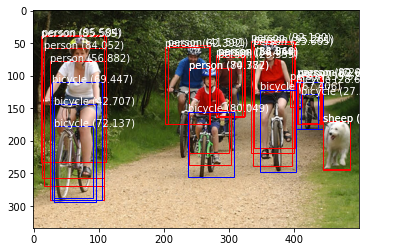

In [677]:

preds_pipeline = model_pipeline.predict(data={INPUT_NODE: test_image})
draw_preds_bbs(photo_filename, preds_pipeline)

In [144]:
def read_labels(labels_path):
    with open(labels_path) as f:
        labels = f.readlines()
    labels = [c.strip() for c in labels]
    return labels

In [145]:
labels = read_labels('coco.txt')
labels[:5]

['person', 'bicycle', 'car', 'motorbike', 'aeroplane']

In [146]:
import colorsys
import random

def generate_colors(class_names):
    hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] ), int(x[1] ), int(x[2] )), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors

In [676]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle

def draw_preds_bbs(file_name, preds_pipeline):
    print(preds_pipeline['all_boxes'].shape)
    print(preds_pipeline['all_scores'].shape)
    boxes = preds_pipeline['all_boxes']
    pred_conf = preds_pipeline['all_scores']
    print(pred_conf.shape)
    print('start drawing boxes')
    data = pyplot.imread(file_name)
    ax = pyplot.gca()
    colors = generate_colors(labels)
    for i in range(len(boxes)):
        box = boxes[i]
        class_id = np.argmax(pred_conf[i])
        score = pred_conf[i][class_id]
#         y1, x1, y2, x2 = box[0], box[1], box[2], box[3]
        x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
        width, height = x2 - x1, y2 - y1
        rect = Rectangle(
            (x1 * image_w, y1 * image_h),
            width * image_w,
            height * image_h,
            fill=False,
            color=colors[class_id]
        )
        ax.add_patch(rect)
        label = "%s (%.3f)" % (labels[class_id], score*100)
        pyplot.text(
            x1* image_w,
            y1* image_h,
            label, 
            color= 'white'
        )
    pyplot.imshow(data)
    pyplot.show()

In [248]:
np.stack([
    [1],
    [2],
    [3]
]).reshape(-1)

array([1, 2, 3])

# add nms

In [780]:
nms_spec = ct.proto.Model_pb2.Model()
nms_spec.specificationVersion = 3
nms = nms_spec.nonMaximumSuppression
nms.confidenceInputFeatureName = "all_scores"
nms.coordinatesInputFeatureName = "all_boxes"
nms.confidenceOutputFeatureName = "scores"
nms.coordinatesOutputFeatureName = "boxes"
nms.iouThresholdInputFeatureName = "iouThreshold"
nms.confidenceThresholdInputFeatureName = "confidenceThreshold"

In [781]:
nms.iouThreshold = 0.5
nms.confidenceThreshold = 0.4
nms.pickTop.perClass = True

In [782]:
nms.stringClassLabels.vector.extend(labels)

In [792]:
decoder_spec = split_model.get_spec()

modified_decoder_builder = ct.models.neural_network.NeuralNetworkBuilder(spec= decoder_spec)
decoder_spec.description

input {
  name: "Identity"
  type {
    multiArrayType {
      shape: 1
      shape: 1
      shape: 84
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: 1
        }
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 84
          upperBound: 84
        }
      }
    }
  }
}
output {
  name: "all_scores"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}
output {
  name: "all_boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
    }
  }
}

In [793]:
modified_decoder_builder.set_output(output_names=['all_scores', 'all_boxes'], output_dims=[(1,80), (1,4)])


In [794]:
score_ma_type = modified_decoder_builder.spec.description.output[0].type.multiArrayType
score_ma_type.shapeRange.sizeRanges.add()
score_ma_type.shapeRange.sizeRanges.add()
score_ma_type.shapeRange.sizeRanges[0].lowerBound = 0
score_ma_type.shapeRange.sizeRanges[0].upperBound = -1

score_ma_type.shapeRange.sizeRanges[1].lowerBound = 80
score_ma_type.shapeRange.sizeRanges[1].upperBound = 80

score_ma_type

shape: 1
shape: 80
dataType: DOUBLE
shapeRange {
  sizeRanges {
    upperBound: -1
  }
  sizeRanges {
    lowerBound: 80
    upperBound: 80
  }
}

In [795]:
box_ma_type = modified_decoder_builder.spec.description.output[1].type.multiArrayType
box_ma_type.shapeRange.sizeRanges.add()
box_ma_type.shapeRange.sizeRanges.add()
box_ma_type.shapeRange.sizeRanges[0].lowerBound = 0
box_ma_type.shapeRange.sizeRanges[0].upperBound = -1

box_ma_type.shapeRange.sizeRanges[1].lowerBound = 4
box_ma_type.shapeRange.sizeRanges[1].upperBound = 4

box_ma_type

shape: 1
shape: 4
dataType: DOUBLE
shapeRange {
  sizeRanges {
    upperBound: -1
  }
  sizeRanges {
    lowerBound: 4
    upperBound: 4
  }
}

In [796]:
modified_decoder_builder.spec.description

input {
  name: "Identity"
  type {
    multiArrayType {
      shape: 1
      shape: 1
      shape: 84
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: 1
        }
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 84
          upperBound: 84
        }
      }
    }
  }
}
output {
  name: "all_scores"
  type {
    multiArrayType {
      shape: 1
      shape: 80
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 80
          upperBound: 80
        }
      }
    }
  }
}
output {
  name: "all_boxes"
  type {
    multiArrayType {
      shape: 1
      shape: 4
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 4
        }
      }
    }
  }
}

In [797]:
model_decoder = ct.models.MLModel(modified_decoder_builder.spec)

for i in range(2):
    decoder_output = model_decoder._spec.description.output[i].SerializeToString()
    print(f'---------- {decoder_output}')
    nms_spec.description.input.add()
    nms_spec.description.input[i].ParseFromString(decoder_output)

    nms_spec.description.output.add()
    nms_spec.description.output[i].ParseFromString(decoder_output)
    
print(nms_spec.description)   

---------- b'\n\nall_scores\x1a *\x1e\n\x02\x01P\x10\xc0\x80\x04\xfa\x01\x13\n\x0b\x10\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\n\x04\x08P\x10P'
---------- b'\n\tall_boxes\x1a *\x1e\n\x02\x01\x04\x10\xc0\x80\x04\xfa\x01\x13\n\x0b\x10\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\n\x04\x08\x04\x10\x04'
input {
  name: "all_scores"
  type {
    multiArrayType {
      shape: 1
      shape: 80
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 80
          upperBound: 80
        }
      }
    }
  }
}
input {
  name: "all_boxes"
  type {
    multiArrayType {
      shape: 1
      shape: 4
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 4
        }
      }
    }
  }
}
output {
  name: "all_scores"
  type {
    multiArrayType {
      shape: 1
      shape: 80
      dataType: DOUBLE
      shapeRange

In [798]:
nms_spec.description.output[0].name = 'scores'
nms_spec.description.output[1].name = 'boxes'

In [799]:
output_sizes=[80, 4]
for i in range(2):
    ma_type = nms_spec.description.output[i].type.multiArrayType
    
    ma_type.shapeRange.sizeRanges.add()
    ma_type.shapeRange.sizeRanges[0].lowerBound = 0
    ma_type.shapeRange.sizeRanges[0].upperBound = -1
    ma_type.shapeRange.sizeRanges.add()
    ma_type.shapeRange.sizeRanges[1].lowerBound = output_sizes[i]
    ma_type.shapeRange.sizeRanges[1].upperBound = output_sizes[i]
    del ma_type.shape[:]
    print(f'---------- {nms_spec.description.output[i]}')

---------- name: "scores"
type {
  multiArrayType {
    dataType: DOUBLE
    shapeRange {
      sizeRanges {
        upperBound: -1
      }
      sizeRanges {
        lowerBound: 80
        upperBound: 80
      }
      sizeRanges {
      }
      sizeRanges {
      }
    }
  }
}

---------- name: "boxes"
type {
  multiArrayType {
    dataType: DOUBLE
    shapeRange {
      sizeRanges {
        upperBound: -1
      }
      sizeRanges {
        lowerBound: 4
        upperBound: 4
      }
      sizeRanges {
      }
      sizeRanges {
      }
    }
  }
}



In [800]:
model_nms = ct.models.MLModel(nms_spec)
model_nms.save('yolov2-nms.mlmodel')

/Users/ankit/opt/anaconda3/envs/coreml_codeforge/lib/python3.8/site-packages/coremltools/models/model.py:115: RuntimeWarning: You will not be able to run predict() on this Core ML model. Underlying exception message was: Error compiling model: "Error reading protobuf spec. validator error: If shape information is provided for confidence output, 2 dimensions must be specified using either shape (deprecated) or allowedShapes.".
  _warnings.warn(


In [801]:
input_features = [ ('input_1', datatypes.Array(1,1,1)), # Placeholder
                   ('iouThreshold', datatypes.Double()),
                   ('confidenceThreshold', datatypes.Double())]
                  
output_features = [ 'scores', 'boxes' ]

In [802]:


pipeline = ct.models.pipeline.Pipeline(input_features, output_features)
pipeline.spec.specificationVersion = 3

pipeline.add_model(yolo_coreml_model_modified)
pipeline.add_model(model_decoder)
pipeline.add_model(model_nms)

In [803]:
pipeline.spec.description.input[0].ParseFromString(yolo_coreml_model_modified._spec.description.input[0].SerializeToString())
pipeline.spec.description.output[0].ParseFromString(model_nms._spec.description.output[0].SerializeToString())
pipeline.spec.description.output[1].ParseFromString(model_nms._spec.description.output[1].SerializeToString())



41

In [804]:
model_pipeline = ct.models.MLModel(pipeline.spec)
model_pipeline.save("yolov2-pipeline.mlmodel")

In [805]:
pipeline.spec.description

input {
  name: "input_1"
  type {
    imageType {
      width: 608
      height: 608
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 608
          upperBound: 608
        }
        heightRange {
          lowerBound: 608
          upperBound: 608
        }
      }
    }
  }
}
input {
  name: "iouThreshold"
  type {
    doubleType {
    }
  }
}
input {
  name: "confidenceThreshold"
  type {
    doubleType {
    }
  }
}
output {
  name: "scores"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 80
          upperBound: 80
        }
        sizeRanges {
        }
        sizeRanges {
        }
      }
    }
  }
}
output {
  name: "boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 

In [806]:
INPUT_NODE

'input_1'

In [807]:
preds_final_pipeline = model_pipeline.predict(data={INPUT_NODE: test_image})

RuntimeError: Error compiling model: "Error reading protobuf spec. validator error: If shape information is provided for confidence output, 2 dimensions must be specified using either shape (deprecated) or allowedShapes.".